## Comparison:
### 1. Benchmark (batch_size=18*2=36)¶
### 2. Digital (batch_size=8)
### 3. Digital (batch_size=16*2=32)
### 4. Analog (batch_size=16)
### 5. Analog (batch_size=8*2=16)


In [2]:
import re
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Extract accuracy/IOU/MIOU from the given log files (YOLOP):
def extract_metrics_from_log(log_file):
    acc_values = []
    iou_values = []
    miou_values = []

    with open(log_file, 'r') as file:
        for line in file:
#             match = re.search(r'Lane line Segment: Acc\((\d+\.\d+)\)', line)   
            match = re.search(r'Lane line Segment: Acc\((\d+\.\d+)\)\s+IOU\s\((\d+\.\d+)\)\s+mIOU\((\d+\.\d+)\)', line)


            if match:
                acc_values.append(float(match.group(1)))
                iou_values.append(float(match.group(2)))
                miou_values.append(float(match.group(3)))

    return acc_values, iou_values, miou_values

def plot_metrics(acc_values, iou_values, miou_values):
    epochs = range(1, len(acc_values) + 1)

    plt.figure(figsize=(15, 15))

    plt.subplot(3, 1, 1)
    plt.plot(epochs, acc_values, marker='o', color='b')
    plt.title('Testing - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Acc')
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.plot(epochs, iou_values, marker='o', color='g')
    plt.title('Testing - Intersection over Union (IOU)')
    plt.xlabel('Epoch')
    plt.ylabel('IOU')
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(epochs, miou_values, marker='o', color='r')
    plt.title('Testing - Mean Intersection over Union (mIOU)')
    plt.xlabel('Epoch')
    plt.ylabel('mIOU')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    plt.pause(1)
    plt.savefig('withpreprocess_digital.png')
    
    
# Extract loss from the given log files (YOLOP):
def extract_loss_from_log(log_file):
    loss_values = []
    loss_values2 = []

    with open(log_file, 'r') as file:
        for line in file: 
            
            match = re.search(r'Loss (\d+\.\d+) \((\d+\.\d+)\)', line)

            if match:
                loss_values.append(float(match.group(1)))
                loss_values2.append(float(match.group(2)))
                               
    return loss_values, loss_values2


def plot_loss(loss_values):
    times = range(1, len(loss_values) + 1)

    plt.figure(figsize=(12, 6))

    plt.scatter(times, loss_values)
#     plt.plot(times, loss_values, marker='o', color='b')
    plt.title('Training Loss')
    plt.xlabel('Times')
    plt.ylabel('Training_Loss')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [4]:
path_1 = './_2024-02-24-00-05_train.log' # benchmark (2*18=36) -- done

path_2_1 = './_2024-02-22-18-01_train.log'  # digital (8) -- done
path_2_2 = './_2024-02-25-01-07_train.log'

path_3 = './_2024-03-06-23-34_train.log'   # digital (2*8=16) -- done
path_4 = './_2024-02-26-22-34_train.log'   # analog (16) -- done
path_5 = './_2024-02-29-06-30_train.log'   #analog (2*8=16) -- done


### Accuracy

In [5]:
acc_values_1, iou_values_1, miou_values_1 = extract_metrics_from_log(path_1)

acc_values_2_1, iou_values_2_1, miou_values_2_1 = extract_metrics_from_log(path_2_1)
acc_values_2_2, iou_values_2_2, miou_values_2_2 = extract_metrics_from_log(path_2_2)
acc_values_2 = acc_values_2_1 + acc_values_2_2
iou_values_2 = iou_values_2_1 + iou_values_2_2
miou_values_2 = miou_values_2_1 + miou_values_2_2

acc_values_3, iou_values_3, miou_values_3 = extract_metrics_from_log(path_3)
acc_values_4, iou_values_4, miou_values_4 = extract_metrics_from_log(path_4)
acc_values_5, iou_values_5, miou_values_5 = extract_metrics_from_log(path_5)




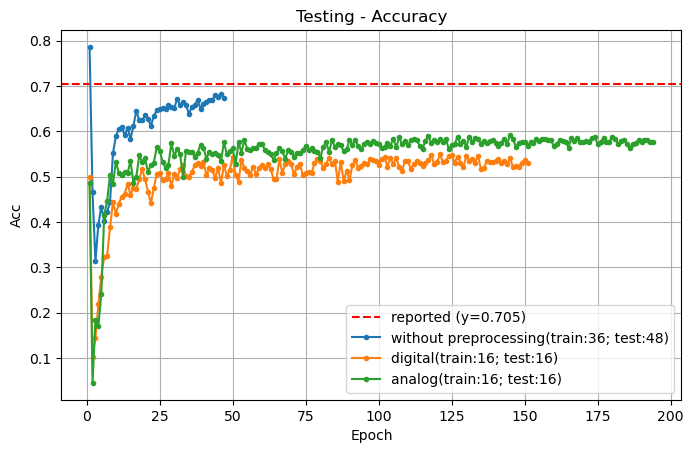

In [8]:
plt.figure(figsize=(10*0.8, 6*0.8))

epochs_1 = range(1, len(acc_values_1) + 1)
epochs_2 = range(1, len(acc_values_2) + 1)
epochs_3 = range(1, len(acc_values_3) + 1)
epochs_4 = range(1, len(acc_values_4) + 1)
epochs_5 = range(1, len(acc_values_5) + 1)

plt.axhline(y=0.705, color='r', linestyle='--', label='reported (y=0.705)')
plt.plot(epochs_1, acc_values_1, label='without preprocessing(train:36; test:48)', marker='.')
# plt.plot(epochs_2, acc_values_2, label='digital(train:8; test:24)', marker='.')
plt.plot(epochs_3, acc_values_3, label='digital(train:16; test:16)', marker='.')
# plt.plot(epochs_4, acc_values_4, label='analog(16)', marker='.')
plt.plot(epochs_5, acc_values_5, label='analog(train:16; test:16)', marker='.')

plt.title('Testing - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.grid(True)
plt.legend()

plt.savefig('Acc_compare.png',dpi=600)

### IOU

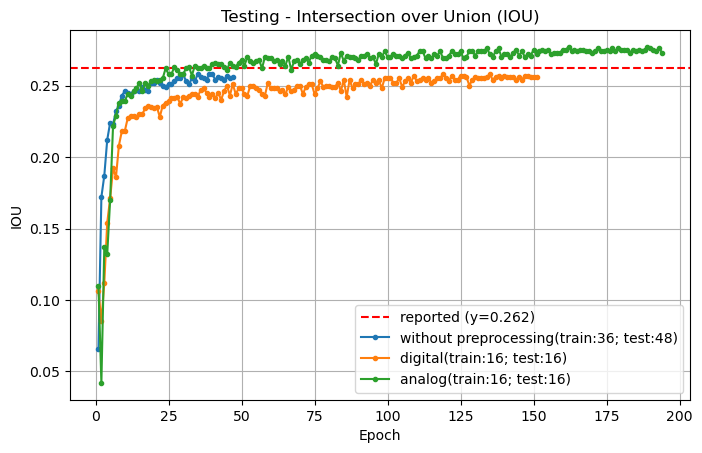

In [10]:
plt.figure(figsize=(10*0.8, 6*0.8))

epochs_1 = range(1, len(acc_values_1) + 1)
epochs_2 = range(1, len(acc_values_2) + 1)
epochs_3 = range(1, len(acc_values_3) + 1)
epochs_4 = range(1, len(acc_values_4) + 1)
epochs_5 = range(1, len(acc_values_5) + 1)

# plt.axhline(y=0.238, color='r', linestyle='--', label='reported (y=0.238)')
# plt.axhline(y=0.245, color='r', linestyle='--', label='reported (y=0.245)')
# plt.axhline(y=0.262+0.007, color='r', linestyle='--', label='reported (y=0.262+0.007)')
plt.axhline(y=0.262, color='r', linestyle='--', label='reported (y=0.262)')
plt.plot(epochs_1, iou_values_1, label='without preprocessing(train:36; test:48)', marker='.')
# plt.plot(epochs_2, iou_values_2, label='digital(train:8; test:24)', marker='.')
plt.plot(epochs_3, iou_values_3, label='digital(train:16; test:16)', marker='.')
# plt.plot(epochs_4, iou_values_4, label='analog(16)', marker='.')
plt.plot(epochs_5, iou_values_5, label='analog(train:16; test:16)', marker='.')

plt.title('Testing - Intersection over Union (IOU)')
plt.xlabel('Epoch')
plt.ylabel('IOU')
plt.grid(True)
plt.legend()

plt.savefig('IOU_compare.png',dpi=600)


## What's next?
We can try: 
(1) batch size 
(2) training method (1. end-to-end vs step-by-step; 2. multi-task vs single task)
(3) preprocessing parameter 

We can also analyze drivable area segmentation in addition to ll detection.

We can also try smaller models, since there is not quite difference in the current model. 

Instead of performance, we can also focus on speed; or specific condition (night/fog)